### The purpose of this notebook is to perform data exploration of stock price change

## Analysis
<h4>Categories:</h4>
<ol>
    <li>Increase in preceding week, increase in first trading day after announcement</li>
    <li>Increase in preceding week, decrease in first trading day after announcement</li>
    <li>Decrease in preceding week, increase in first trading day after announcement</li>
    <li>Decrease in preceding week, decrease in first trading day after announcement</li>
</ol>
<h4>Depdent Variables:</h4>
<p>t+2: price change from day t+1 close to day t+2 close</p>

<h4>Indepdent Variables:</h4>
<ol>
    <li>t-7:Price change in the week preceding the announcement</li>
    <li>t0:Price change from the closing price immediately preceding the announcement to the open price immediately after the announcement</li>
    <li>t+1:Price change from the open on day t+1 to the close on day t+1</li>
</ol>

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 50)

#### Import dataset

In [3]:
fileName = 'data/trade_dates_data.xlsx'

In [4]:
sheetName = 'pct_chng_before_mrkt'

In [5]:
USECOLS = [
            'ticker',
            'company',
            'earnings_flag',
            'earnings_ann_date',
            'ann_price_open',
            'ann_price_close',
            'week preceeding date',
            'week_price_open',
            'week_price_close',
            'pct_chng_t-7',
            'week_proceed_code',
            'day preceeding date',
            'day_b4_price_open',
            'day_b4_price_close',
            '1 trade day post',
            'day_after_price_open',
            'day_after_price_close',
            'close t+1 diff open t+1',
            'day_after_code',
            'pct_chng_t0',
            'pct_chng_t+1',
            '2 trade days post',
            '2_days_after_price_open',
            '2_days_after_price_close',
            'pct_chng_t+2',
            'category',
            'meets_threshold',
            ]

In [15]:
b4_data = pd.read_excel(fileName,sheet_name = sheetName, usecols=USECOLS, parse_dates=True)

#### View data

In [16]:
b4_data.head()

,ticker,company,earnings_flag,earnings_ann_date,ann_price_open,ann_price_close,week preceeding date,week_price_open,week_price_close,pct_chng_t-7,week_proceed_code,day preceeding date,day_b4_price_open,day_b4_price_close,1 trade day post,day_after_price_open,day_after_price_close,close t+1 diff open t+1,day_after_code,pct_chng_t0,pct_chng_t+1,2 trade days post,2_days_after_price_open,2_days_after_price_close,pct_chng_t+2,category,meets_threshold
0,AAMC,Altisource Asset Management Corp,Before Market Open,2020-11-05,22.980000,22.980000,2020-10-28,22.290001,23.000000,-0.000870,decrease,2020-11-03,24.000000,23.000000,2020-11-05,22.980000,22.980000,0.000000,no change,-0.000870,0.000000,2020-11-06,22.059999,21.750000,-0.056552,0,0
1,AES,AES Corp,Before Market Open,2020-11-06,20.910000,20.410000,2020-10-29,19.320000,19.530001,0.043116,increase,2020-11-04,20.260000,19.940001,2020-11-06,20.910000,20.410000,-0.024498,decrease,0.046389,-0.024498,2020-11-09,21.930000,20.969999,0.026705,2,1
2,ALE,ALLETE Inc,Before Market Open,2020-11-09,55.660000,57.223980,2020-10-30,51.799999,51.004200,0.108692,increase,2020-11-05,54.000000,53.426846,2020-11-09,55.660000,57.223980,0.027331,increase,0.040121,0.027331,2020-11-10,58.700001,57.461300,0.004130,1,1
3,ALLK,Allakos Inc,Before Market Open,2020-11-09,101.959999,104.220001,2020-10-30,88.000000,95.129997,0.087219,increase,2020-11-05,102.610001,98.870003,2020-11-09,101.959999,104.220001,0.021685,increase,0.030306,0.021685,2020-11-10,100.930000,100.989998,-0.031983,1,1
4,AMPH,Amphastar Pharmaceuticals Inc,Before Market Open,2020-11-06,20.790001,19.200001,2020-10-29,19.559999,20.090000,-0.046354,decrease,2020-11-04,20.230000,20.740000,2020-11-06,20.790001,19.200001,-0.082813,decrease,0.002405,-0.082813,2020-11-09,19.780001,19.010000,-0.009995,4,1


In [17]:
sheetName_2 = 'pct_chng_after_mrkt'

In [18]:
after_data = pd.read_excel(fileName,sheet_name = sheetName_2, usecols=USECOLS, parse_dates=True)

#### View data

In [19]:
after_data.head()

,ticker,company,earnings_flag,earnings_ann_date,ann_price_open,ann_price_close,week preceeding date,week_price_open,week_price_close,pct_chng_t-7,week_proceed_code,day preceeding date,day_b4_price_open,day_b4_price_close,1 trade day post,day_after_price_open,day_after_price_close,close t+1 diff open t+1,day_after_code,pct_chng_t0,pct_chng_t+1,2 trade days post,2_days_after_price_open,2_days_after_price_close,pct_chng_t+2,category,meets_threshold
0,AAIC,Arlington Asset Investment Corp,After Market Close,2020-11-03,2.63,2.670000,2020-10-27,2.680000,2.56,0.041199,increase,2020-11-02,2.46,2.58,2020-11-04,2.690000,2.780000,0.032374,increase,0.040892,0.032374,2020-11-05,2.770000,2.670000,-0.041198,1.0,1.0
1,AAOI,Applied Optoelectronics Inc,After Market Close,2020-11-05,9.17,10.020000,2020-10-29,9.570000,9.36,0.065868,increase,2020-11-04,9.17,9.07,2020-11-06,8.114000,7.690000,-0.055137,decrease,-0.117821,-0.055137,2020-11-09,7.910000,7.715000,0.003240,2.0,1.0
2,ADMP,Adamis Pharmaceuticals Corp,After Market Close,2020-11-09,0.78,0.720000,2020-11-02,0.710000,0.71,0.013889,increase,2020-11-06,0.70,0.72,2020-11-10,0.700000,0.690000,-0.014493,decrease,-0.028571,-0.014493,2020-11-11,0.700000,0.720000,0.041667,2.0,0.0
3,AE,Adams Resources & Energy Inc,After Market Close,2020-11-05,20.32,21.120001,2020-10-29,19.700001,19.33,0.084754,increase,2020-11-04,19.50,19.00,2020-11-06,21.790001,21.129999,-0.031235,decrease,0.128040,-0.031235,2020-11-09,21.799999,23.889999,0.115530,2.0,1.0
4,AESE,Allied Esports Entertainment Inc,After Market Close,2020-11-09,1.10,0.988000,2020-11-02,0.971000,0.94,0.048583,increase,2020-11-06,1.02,1.06,2020-11-10,0.980000,0.926000,-0.058315,decrease,-0.081633,-0.058315,2020-11-11,0.930000,0.920000,-0.006522,2.0,1.0


### Combine datasets

In [20]:
full_df = b4_data.append(after_data)

#### View dataset

In [21]:
full_df.head(3)

,ticker,company,earnings_flag,earnings_ann_date,ann_price_open,ann_price_close,week preceeding date,week_price_open,week_price_close,pct_chng_t-7,week_proceed_code,day preceeding date,day_b4_price_open,day_b4_price_close,1 trade day post,day_after_price_open,day_after_price_close,close t+1 diff open t+1,day_after_code,pct_chng_t0,pct_chng_t+1,2 trade days post,2_days_after_price_open,2_days_after_price_close,pct_chng_t+2,category,meets_threshold
0,AAMC,Altisource Asset Management Corp,Before Market Open,2020-11-05,22.98,22.98000,2020-10-28,22.290001,23.000000,-0.000870,decrease,2020-11-03,24.00,23.000000,2020-11-05,22.98,22.98000,0.000000,no change,-0.000870,0.000000,2020-11-06,22.059999,21.750000,-0.056552,0.0,0.0
1,AES,AES Corp,Before Market Open,2020-11-06,20.91,20.41000,2020-10-29,19.320000,19.530001,0.043116,increase,2020-11-04,20.26,19.940001,2020-11-06,20.91,20.41000,-0.024498,decrease,0.046389,-0.024498,2020-11-09,21.930000,20.969999,0.026705,2.0,1.0
2,ALE,ALLETE Inc,Before Market Open,2020-11-09,55.66,57.22398,2020-10-30,51.799999,51.004200,0.108692,increase,2020-11-05,54.00,53.426846,2020-11-09,55.66,57.22398,0.027331,increase,0.040121,0.027331,2020-11-10,58.700001,57.461300,0.004130,1.0,1.0


## Calucation Explanations

### Week Change:  pct_chng_t-7
<p> Calculations = (announcement day close price - week proceeding close price) / (announcement day close price)

In [22]:
week_prior_pct_change = list((full_df['ann_price_close'] - full_df['week_price_close'] )/full_df['ann_price_close'])
week_prior_pct_change[:5]

[-0.0008703420539754524,
 0.04311607870981915,
 0.10869184519207839,
 0.0872193805923694,
 -0.04635413306098222]

### Verify the pct_chng_t-7 column matches the expected calulcations above

In [23]:
stock_data = full_df['pct_chng_t-7'].tolist()

for i in range(len(stock_data)):
    if stock_data[i] != week_prior_pct_change[i]:
        print(f'Stock Data: {stock_data[i]} week data: {week_prior_pct_change[i]}')

Stock Data: nan week data: nan
Stock Data: nan week data: nan
Stock Data: nan week data: nan
Stock Data: nan week data: nan
Stock Data: nan week data: nan
Stock Data: nan week data: nan
Stock Data: nan week data: nan


### Filter data for analysis columns only

In [24]:
analysis_cols = [
            'ticker',
            'company',
            'earnings_flag',
            'pct_chng_t-7',
            'pct_chng_t0',
            'pct_chng_t+1',
            'pct_chng_t+2',
            'category',
            'meets_threshold',
            ]

In [25]:
b4_analysis = b4_data[analysis_cols].copy()
after_analysis = after_data[analysis_cols].copy()

#### View data

In [26]:
b4_analysis.head()

,ticker,company,earnings_flag,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2,category,meets_threshold
0,AAMC,Altisource Asset Management Corp,Before Market Open,-0.000870,-0.000870,0.000000,-0.056552,0,0
1,AES,AES Corp,Before Market Open,0.043116,0.046389,-0.024498,0.026705,2,1
2,ALE,ALLETE Inc,Before Market Open,0.108692,0.040121,0.027331,0.004130,1,1
3,ALLK,Allakos Inc,Before Market Open,0.087219,0.030306,0.021685,-0.031983,1,1
4,AMPH,Amphastar Pharmaceuticals Inc,Before Market Open,-0.046354,0.002405,-0.082813,-0.009995,4,1


In [27]:
after_analysis.head()

,ticker,company,earnings_flag,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2,category,meets_threshold
0,AAIC,Arlington Asset Investment Corp,After Market Close,0.041199,0.040892,0.032374,-0.041198,1.0,1.0
1,AAOI,Applied Optoelectronics Inc,After Market Close,0.065868,-0.117821,-0.055137,0.003240,2.0,1.0
2,ADMP,Adamis Pharmaceuticals Corp,After Market Close,0.013889,-0.028571,-0.014493,0.041667,2.0,0.0
3,AE,Adams Resources & Energy Inc,After Market Close,0.084754,0.128040,-0.031235,0.115530,2.0,1.0
4,AESE,Allied Esports Entertainment Inc,After Market Close,0.048583,-0.081633,-0.058315,-0.006522,2.0,1.0


### Append datasets

In [28]:
full_data = b4_analysis.append(after_analysis)

#### View data

In [29]:
full_data.head()

,ticker,company,earnings_flag,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2,category,meets_threshold
0,AAMC,Altisource Asset Management Corp,Before Market Open,-0.000870,-0.000870,0.000000,-0.056552,0.0,0.0
1,AES,AES Corp,Before Market Open,0.043116,0.046389,-0.024498,0.026705,2.0,1.0
2,ALE,ALLETE Inc,Before Market Open,0.108692,0.040121,0.027331,0.004130,1.0,1.0
3,ALLK,Allakos Inc,Before Market Open,0.087219,0.030306,0.021685,-0.031983,1.0,1.0
4,AMPH,Amphastar Pharmaceuticals Inc,Before Market Open,-0.046354,0.002405,-0.082813,-0.009995,4.0,1.0


In [30]:
full_data.tail()

,ticker,company,earnings_flag,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2,category,meets_threshold
183,YALA,Yalla Group Ltd,After Market Close,0.249783,-0.047862,-0.032597,-0.032573,2.0,1.0
184,ZAGG,Zagg Inc,After Market Close,0.158824,0.082857,-0.051051,-0.003012,2.0,1.0
185,ZGNX,Zogenix Inc,After Market Close,0.092208,-0.036733,0.047860,-0.041707,1.0,1.0
186,ZI,ZoomInfo Technologies Inc,After Market Close,0.010180,-0.028889,-0.009975,0.025753,2.0,0.0
187,ZIXI,Zix Corp,After Market Close,0.117564,0.105333,-0.122755,0.002985,2.0,1.0


#### Get descriptions and information about dataset

In [31]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 187
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticker           341 non-null    object 
 1   company          341 non-null    object 
 2   earnings_flag    341 non-null    object 
 3   pct_chng_t-7     334 non-null    float64
 4   pct_chng_t0      340 non-null    float64
 5   pct_chng_t+1     340 non-null    float64
 6   pct_chng_t+2     336 non-null    float64
 7   category         334 non-null    float64
 8   meets_threshold  340 non-null    float64
dtypes: float64(6), object(3)
memory usage: 26.6+ KB


In [ ]:
full_data.describe()

# Category 1 Analysis

### Filter data for:
<ol>
    <li> Meets pct change thershold is true </li>
    <li> Category 1: Increase in Increase in preceding week, increase in first trading day after announcement</li>

In [32]:
curr_cat = 1

In [33]:
cat_1_data = full_data[(full_data['category']==curr_cat) & (full_data['meets_threshold']==1)]

#### View Category 1 data

In [34]:
cat_1_data.head()

,ticker,company,earnings_flag,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2,category,meets_threshold
2,ALE,ALLETE Inc,Before Market Open,0.108692,0.040121,0.027331,0.004130,1.0,1.0
3,ALLK,Allakos Inc,Before Market Open,0.087219,0.030306,0.021685,-0.031983,1.0,1.0
8,AY,Atlantica Sustainable Infrastructure PLC,Before Market Open,0.109474,0.042174,0.037293,-0.006051,1.0,1.0
11,BGGSQ,Briggs & Stratton Corp,Before Market Open,0.375000,0.000000,0.041667,-0.043478,1.0,1.0
25,CMT,Core Molding Technologies Inc,Before Market Open,0.164659,0.002217,0.094377,0.012884,1.0,1.0


In [35]:
cat_1_data.shape

(100, 9)

In [36]:
IMP_COLS = [
            'ticker',
            'pct_chng_t-7',
            'pct_chng_t0',
            'pct_chng_t+1',
            'pct_chng_t+2',
    
            ]

In [37]:
cat_1_df = cat_1_data[IMP_COLS].copy()
cat_1_df.head()

,ticker,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2
2,ALE,0.108692,0.040121,0.027331,0.004130
3,ALLK,0.087219,0.030306,0.021685,-0.031983
8,AY,0.109474,0.042174,0.037293,-0.006051
11,BGGSQ,0.375000,0.000000,0.041667,-0.043478
25,CMT,0.164659,0.002217,0.094377,0.012884


### Plot visualizations of dataset

### Analysis:

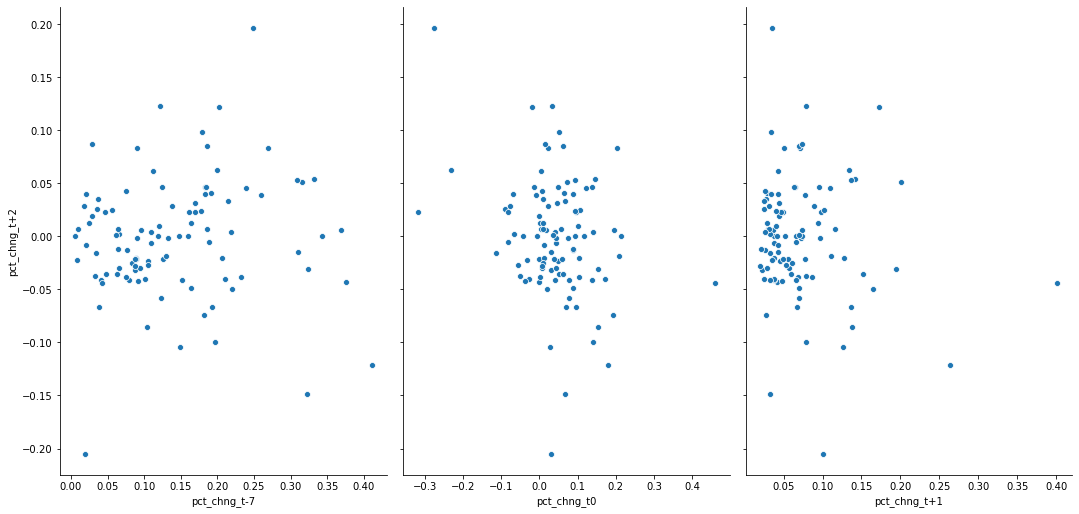

In [38]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(cat_1_df, x_vars=['pct_chng_t-7','pct_chng_t0','pct_chng_t+1'], y_vars = 'pct_chng_t+2',height=7,aspect=0.7)

### Explore the correlation coefficients

### Correlation Analysis: Category 1
<ol>
    <li> Observation:no strong corrlelation b/t t-7 and t+2 </li>
    <li> Observation:no strong corrlelation b/t t0 and t+2 Highest correlation score</li>
    <li> Observation:no strong corrlelation b/t t+1 and t+2. </li>
</ol>

In [39]:
# Compute the correlation matrix
corr = cat_1_df.corr()
corr

,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2
pct_chng_t-7,1.000000,0.297020,0.283093,0.070657
pct_chng_t0,0.297020,1.000000,0.432319,-0.284620
pct_chng_t+1,0.283093,0.432319,1.000000,-0.129817
pct_chng_t+2,0.070657,-0.284620,-0.129817,1.000000


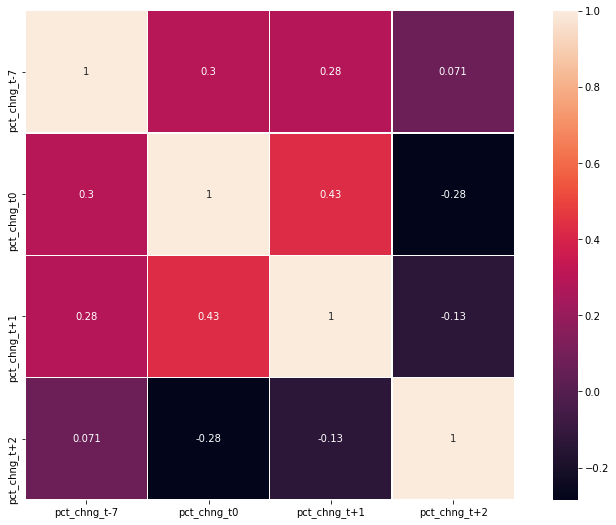

In [40]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr, annot=True, linewidths=.5,square=True, ax=ax)
plt.show()

# Train Machine Learning Models

#### Drop 'ticker' colmn to perform ML

In [41]:
ml_data = cat_1_df.drop('ticker',axis=1)
ml_data.head()

,pct_chng_t-7,pct_chng_t0,pct_chng_t+1,pct_chng_t+2
2,0.108692,0.040121,0.027331,0.004130
3,0.087219,0.030306,0.021685,-0.031983
8,0.109474,0.042174,0.037293,-0.006051
11,0.375000,0.000000,0.041667,-0.043478
25,0.164659,0.002217,0.094377,0.012884


#### Split the data

In [42]:
X = ml_data.drop('pct_chng_t+2',axis=1)
y = ml_data[['pct_chng_t+2']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### 1. Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

#### Init and Fit model

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### View Model coefficients

In [47]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for pct_chng_t-7 is 0.0373419572150715
The coefficient for pct_chng_t0 is -0.18610297949516952
The coefficient for pct_chng_t+1 is 0.04557248164814025


#### View Model Intercept

In [48]:
intercept = regression_model.intercept_[0]

In [49]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0009502620742763319


#### Score model using R squared

In [50]:
regression_model.score(X_test, y_test)

-0.003376220685016529

<p>Note that it is possible to get a negative R-square for equations that do not contain a constant term. Because R-square is defined as the proportion of variance explained by the fit, if the fit is actually worse than just fitting a horizontal line then R-square is negative. In this case, R-square cannot be interpreted as the square of a correlation. Such situations indicate that a constant term should be added to the model.</p>

### Make predictions and get mse

In [51]:
from sklearn.metrics import mean_squared_error
import math

In [52]:
y_predict = regression_model.predict(X_test)

In [53]:
regression_model_mse = mean_squared_error(y_predict, y_test)

In [54]:
regression_model_mse

0.0034255644729603873

In [55]:
math.sqrt(regression_model_mse)

0.058528321972873845

## Conclusion:

<p>So we are an average of 0.06 percentage change away from the ground truth percentage change when making predictions on our test set.</p>